In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 各种采样效果比较（决策界面）

* 简单随机上采样

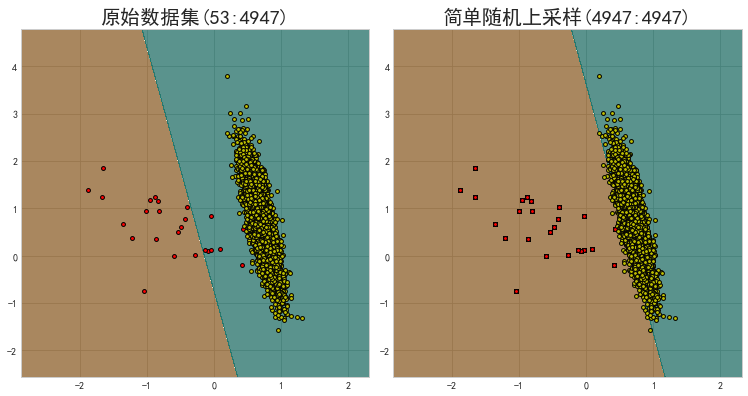

In [3]:
style.use('seaborn-whitegrid')
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('简单随机上采样({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* SMOTE

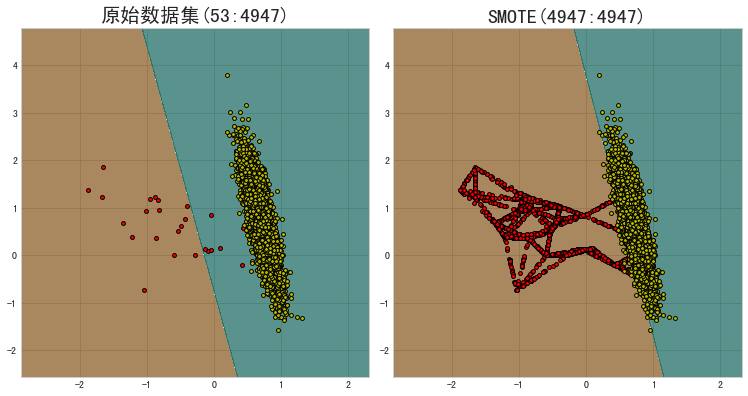

In [9]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('SMOTE({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* ADASYN

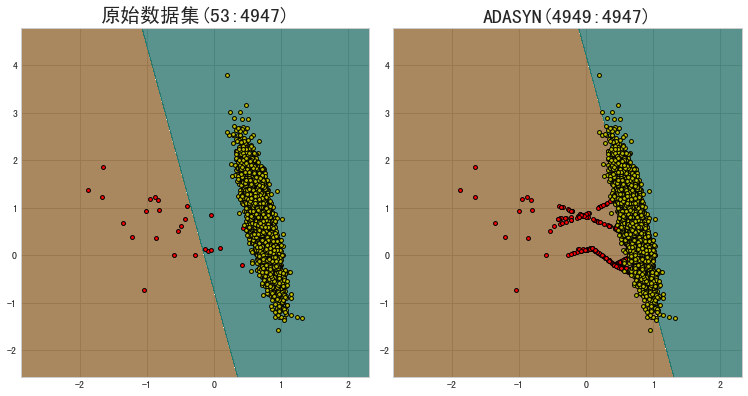

In [10]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.over_sampling import ADASYN
ros = ADASYN(random_state=0)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('ADASYN({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* 简单随机下采样

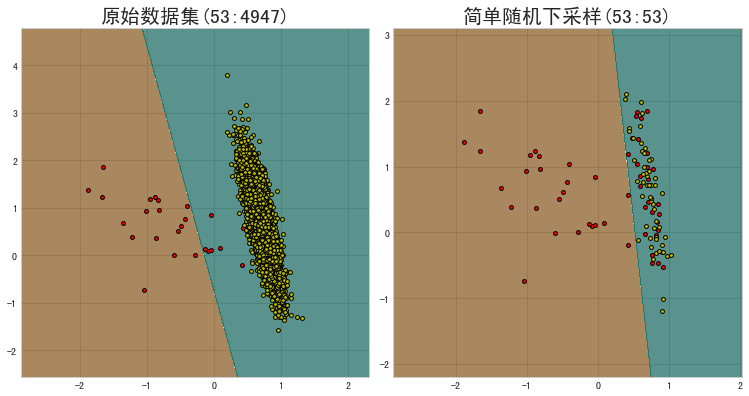

In [11]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('简单随机下采样({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* NearMiss

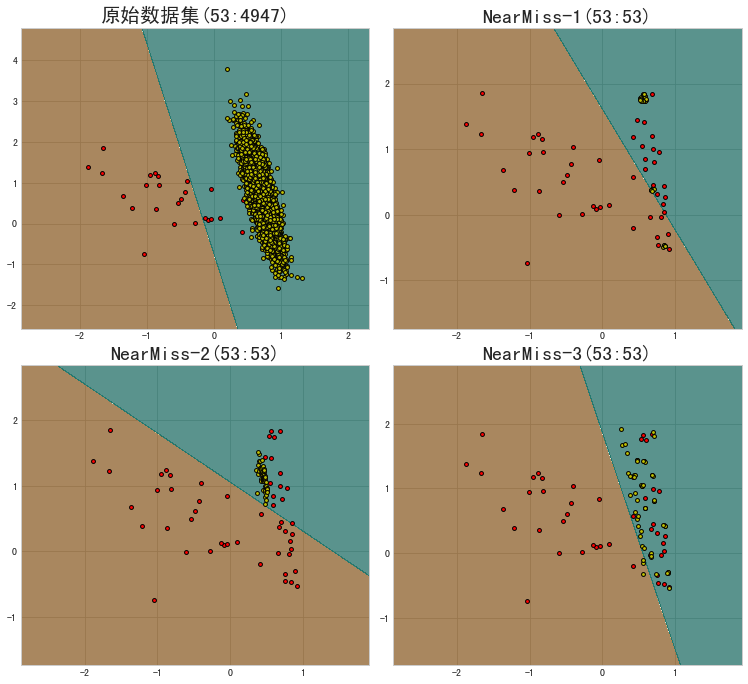

In [12]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,10])
plt.subplot(221)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.under_sampling import NearMiss
ros = NearMiss(version=1)
X, y = ros.fit_sample(X, y)
plt.subplot(222)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('NearMiss-1({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)


from imblearn.under_sampling import NearMiss
ros = NearMiss(version=2)
X, y = ros.fit_sample(X, y)
plt.subplot(223)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('NearMiss-2({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)


from imblearn.under_sampling import NearMiss
ros = NearMiss(version=3)
X, y = ros.fit_sample(X, y)
plt.subplot(224)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('NearMiss-3({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* TomekLinks

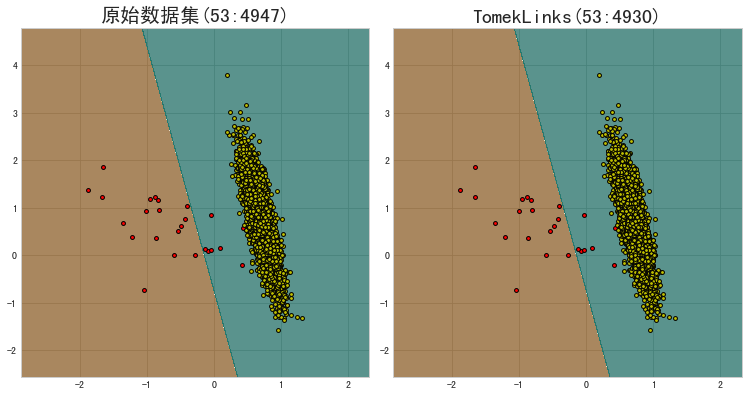

In [13]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.995],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.under_sampling import TomekLinks
ros = TomekLinks()
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('TomekLinks({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

* EditedNearestNeighbours

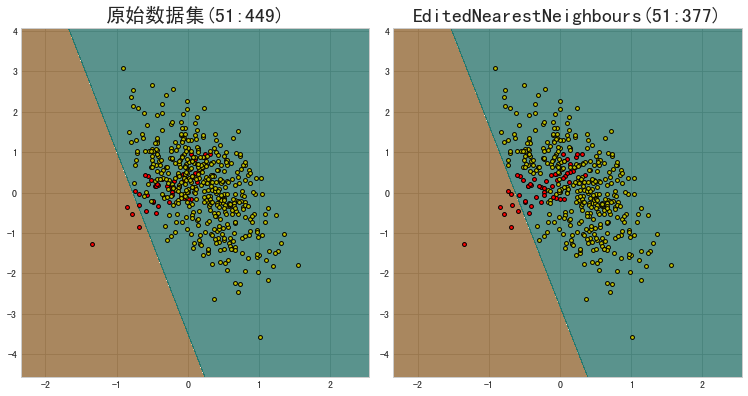

In [14]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.1, 0.9],
                           class_sep=0.2, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.under_sampling import EditedNearestNeighbours
ros = EditedNearestNeighbours(random_state=42)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('EditedNearestNeighbours({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

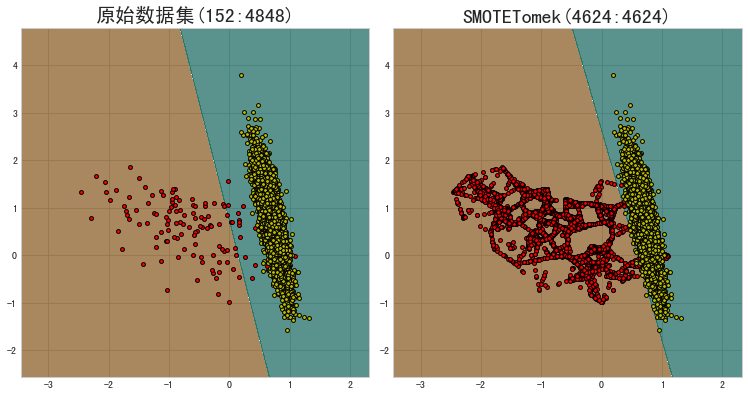

In [15]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.955],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.combine import SMOTETomek
ros = SMOTETomek(random_state=42)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('SMOTETomek({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

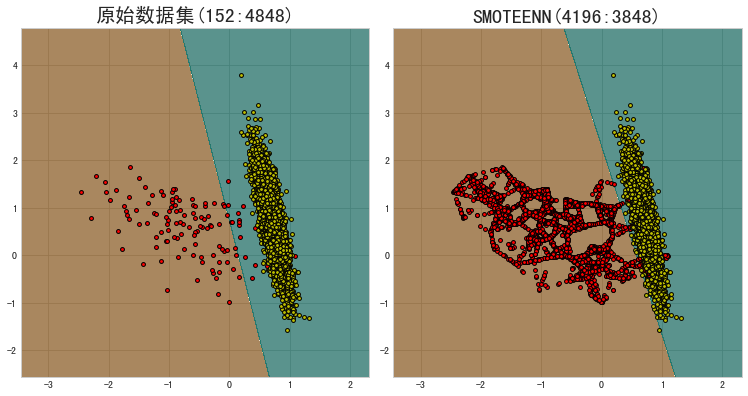

In [16]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.955],
                           class_sep=0.7, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.combine import SMOTEENN
ros = SMOTEENN(random_state=42)
X, y = ros.fit_sample(X, y)
plt.subplot(122)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('SMOTEENN({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()

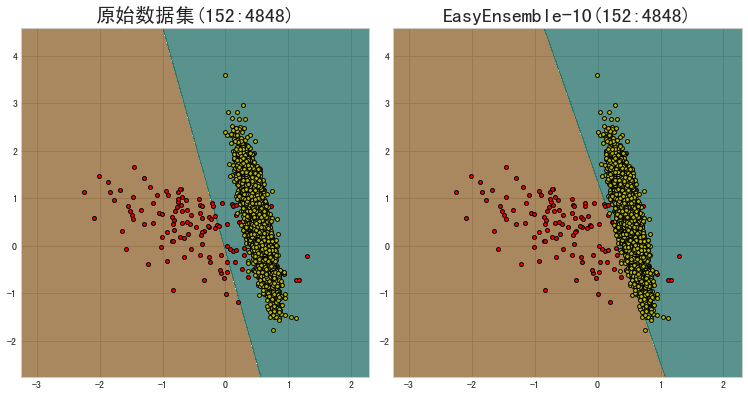

In [17]:
import numpy as np
import matplotlib.pyplot as plt
style.use('seaborn-whitegrid')

from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.005, 0.955],
                           class_sep=0.5, random_state=15)
n_classes = 2
# plot_colors = "ryb"
plot_step = 0.002
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=[11,6])
plt.subplot(121)
pair = [0,1]
clf = LogisticRegression().fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('原始数据集({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")

from imblearn.ensemble import BalancedBaggingClassifier
import warnings
warnings.filterwarnings("ignore")

plt.subplot(122)
pair = [0,1]
clf = BalancedBaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10).fit(X,y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG,alpha=0.65)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.BrBG, edgecolor='black', s=15)

plt.title('EasyEnsemble-10({}:{})'.format(pd.value_counts(y)[0],
                                pd.value_counts(y)[1]),fontsize=20)

plt.axis("tight")
plt.show()